# CUP IT 2022 - Команда YEET - Cекция Data Science

**Задача:** Построить look-alike-модель на основе классификации данных, которая производит скоринг участников программы лояльности и предсказывает, кто из них максимально похож
на людей, недавно присоединившихся к «Клубу полезных привычек».


## Загрузка данных и библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,cross_validate, train_test_split

from sklearn.metrics import precision_score, fbeta_score, f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import make_scorer

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

from sklearn.cluster import DBSCAN
from sklearn.base import BaseEstimator 
from sklearn.base import ClassifierMixin

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

sns.set_style("white")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/YEET/cup_it_data.csv', index_col = 'client_id')

### Объединение исходного набора данных с дополнительными столбцами

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/YEET/Cup_IT_2022_Data_Science_additional_data.csv')

In [ ]:
data2.drop(['index', 'Unnamed: 0'], 1, inplace=True)

In [ ]:
data.reset_index(inplace=True)
data.drop('client_id', axis=1, inplace=True)
data

,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,rto_10_Птица и изделия из птицы,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,NaN,...,73.846425,148.316558,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,176.866878,...,NaN,NaN,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,NaN,NaN
2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,NaN,...,NaN,NaN,NaN,6.651813,NaN,NaN,NaN,5.0,NaN,NaN
3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,237.934884,...,NaN,NaN,NaN,NaN,743.245025,NaN,NaN,4.0,104.784828,NaN
4,0,1.0,856.579037,8992.835847,NaN,NaN,4914.387768,14.0,663.142041,NaN,...,NaN,NaN,NaN,30.906907,NaN,533.725164,2.0,6.0,143.967128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,97.138634,NaN,NaN,NaN,NaN
135057,0,1.0,402.034438,NaN,638.046313,241.225584,NaN,3.0,109.331686,NaN,...,65.491622,NaN,NaN,NaN,NaN,197.113099,NaN,NaN,NaN,NaN
135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,NaN,...,2.670624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from pandas.core.frame import DataFrame
data = pd.concat([data, data2], axis=1)

In [ ]:
data

,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,rto_10_Птица и изделия из птицы,...,cnt_unique_plu_12_Крупы и зерновые,cnt_unique_plu_12_Сыры,cnt_unique_plu_6_Крупы и зерновые,cnt_unique_plu_6_Сыры,cnt_unique_plu_7_Крупы и зерновые,cnt_unique_plu_7_Сыры,cnt_unique_plu_8_Крупы и зерновые,cnt_unique_plu_8_Сыры,cnt_unique_plu_9_Крупы и зерновые,cnt_unique_plu_9_Сыры
0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,NaN,...,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,176.866878,...,NaN,NaN,NaN,2.0,NaN,3.0,NaN,4.0,1.0,1.0
2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,237.934884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1.0,856.579037,8992.835847,NaN,NaN,4914.387768,14.0,663.142041,NaN,...,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135057,0,1.0,402.034438,NaN,638.046313,241.225584,NaN,3.0,109.331686,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Группировка столбцов по категориям и видам

In [ ]:
# категории товаров
categories = set()
for col in data.columns:
    for n in range(1, 13):
        if f'cnt_checks_{n}_' in col or f'rto_{n}_' in col or f'rto_std_{n}_' in col:
            cat = col.split('_')[-1]
            categories.add(cat)

categories

{'Крупы и зерновые',
 'Мясная гастрономия',
 'Овощи - Фрукты',
 'Птица и изделия из птицы',
 'Рыба и рыбные изделия',
 'Сыры'}

In [ ]:
# это все наши столбцы
cols = {
    'client_id': 'client_id',
    'rto_n': [f'rto_{n}' for n in range(6, 13)],
    'rto_n_category': [f'rto_{n}_{cat}' for n in range(6, 13) for cat in categories],
    'rto_std_n': [f'rto_std_{n}' for n in range(6, 13)],
    'rto_std_n_category': [f'rto_stddev_{n}_{cat}' for n in range(6, 13) for cat in categories],
    'cnt_checks_n': [f'cnt_checks_{n}' for n in range(6, 13)],
    'cnt_checks_n_category': [f'cnt_checks_{n}_{cat}' for n in range(6, 13) for cat in categories],
    'unique_n': [f'cnt_unique_plu_{n}' for n in range(6, 13)],
    'is_in_club': 'is_in_club'
}

In [ ]:
for cat in categories:
  cols['rto_' + cat] = [f'rto_{n}_{cat}' for n in range(6, 13)]
  cols['cnt_' + cat] = [f'cnt_checks_{n}_{cat}' for n in range(6, 13)]
  cols['unique_' + cat] = [f'cnt_unique_plu_{n}_{cat}' for n in range(6, 13)]

In [ ]:
# for month in range(6, 13):
#   cols[str(month)] = list(['rto_' + str(month), 'cnt_checks_' + str(month)])
#   cols[str(month)] += list(['rto_' + str(month) + '_' + cat for cat in categories])
#   cols[str(month)] += ['cnt_checks_' + str(month) + '_' + cat for cat in categories]

## Подготовка данных

### Заполнение пропусков

In [ ]:
# заполним пропуски 0 
data = data.fillna(0)

### Добавление новых признаков

Добавим признак - суммарные расходы покупателя за семь месяцев

In [ ]:
data['rto_total'] = np.sum(data[cols['rto_n']], axis=1)

Есть мелкие ошибки в суммах: заменим отрицательные значения нулевым

In [ ]:
for c in cols['rto_n'] + cols['rto_n_category']:
    data[c] = data[c].apply(lambda x: max(0, x))

Средний чек на овощи в декабре - Log

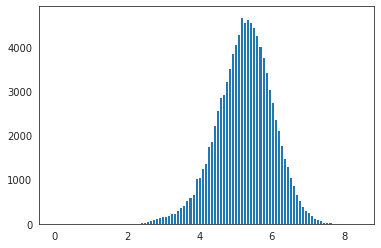

In [ ]:
plt.hist(np.log1p(data['rto_12_Овощи - Фрукты'] / data['cnt_checks_12_Овощи - Фрукты']), bins=100);

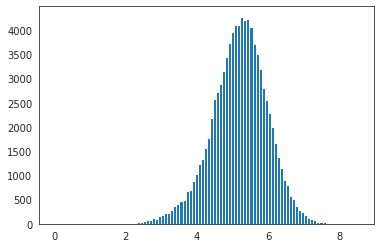

In [ ]:
plt.hist(np.log1p(data['rto_6_Овощи - Фрукты'] / data['cnt_checks_6_Овощи - Фрукты']), bins=100);

In [ ]:
# for cat in categories:
#   for num in ['6', '7', '8', '9', '10', '11', '12']:
#     data['log_avg_rto_' + num + '_' + cat] = np.log1p(data['rto_' + num + '_' + cat] / data['cnt_checks_' + num + '_' + cat])

In [ ]:
# cols['log_avg_rto'] = []

# for cat in ['Овощи - Фрукты']:
#   for num in ['6', '7', '8', '9', '10', '11', '12']:
#     cols['log_avg_rto'] += ['log_avg_rto_' + num + '_' + cat]

Доля покупок фруктов и овощей

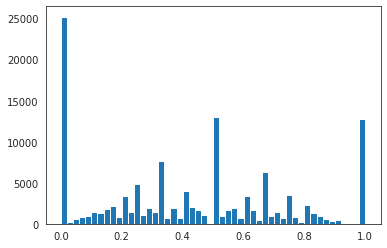

In [ ]:
plt.hist(data['cnt_checks_12_Овощи - Фрукты'] / data['cnt_checks_12'], bins=50);

Добавим доли в качестве признаков:

In [ ]:
for cat in categories:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    data['part_cnt_' + num + '_' + cat] = data['cnt_checks_' + num + '_' + cat] / data['cnt_checks_'  + num]

In [ ]:
cols['part_cnt'] = []

for cat in ['Овощи - Фрукты']:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    cols['part_cnt'] += ['part_cnt_' + num + '_' + cat]

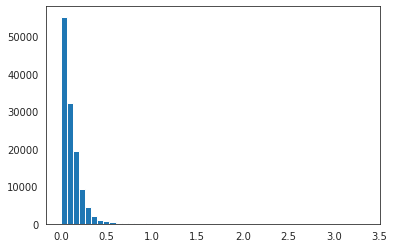

In [ ]:
plt.hist(data['rto_12_Овощи - Фрукты'] / data['rto_12'], bins=50);

In [ ]:
for cat in categories:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    data['part_rto_' + num + '_' + cat] = data['rto_' + num + '_' + cat] / data['rto_'  + num]

In [ ]:
cols['part_rto'] = []

for cat in ['Овощи - Фрукты']:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    cols['part_rto'] += ['part_rto_' + num + '_' + cat]

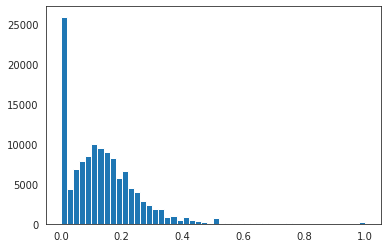

In [ ]:
plt.hist(data['cnt_unique_plu_12_Овощи - Фрукты'] / data['cnt_unique_plu_12'], bins=50);

In [ ]:
for cat in categories:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    data['part_unique_' + num + '_' + cat] = data['cnt_unique_plu_' + num + '_' + cat] / data['cnt_unique_plu_'  + num]

In [ ]:
cols['part_unique'] = []

for cat in ['Овощи - Фрукты']:
  for num in ['6', '7', '8', '9', '10', '11', '12']:
    cols['part_unique'] += ['part_unique_' + num + '_' + cat]

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

In [ ]:
data.shape[0]

135061

In [ ]:
data

,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,rto_10_Птица и изделия из птицы,...,part_unique_10_Птица и изделия из птицы,part_unique_11_Птица и изделия из птицы,part_unique_12_Птица и изделия из птицы,part_unique_6_Крупы и зерновые,part_unique_7_Крупы и зерновые,part_unique_8_Крупы и зерновые,part_unique_9_Крупы и зерновые,part_unique_10_Крупы и зерновые,part_unique_11_Крупы и зерновые,part_unique_12_Крупы и зерновые
0,0,0.0,300.021342,2418.116714,853.016746,0.000000,5092.170392,3.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.00000,0.000000,0.0,0.0
1,0,1.0,519.031384,19899.211736,0.000000,0.000000,32392.636661,7.0,0.000000,176.866878,...,0.014286,0.050000,0.000000,0.000000,0.0,0.0,0.03125,0.000000,0.0,0.0
2,0,0.0,131.165948,411.347689,0.000000,0.000000,1416.656061,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
3,0,2.0,0.000000,35043.643030,0.000000,0.000000,8460.544337,7.0,1425.707450,237.934884,...,0.071429,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
4,0,1.0,856.579037,8992.835847,0.000000,0.000000,4914.387768,14.0,663.142041,0.000000,...,0.000000,0.022222,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,0,0.0,196.068192,0.000000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
135057,0,1.0,402.034438,0.000000,638.046313,241.225584,0.000000,3.0,109.331686,0.000000,...,0.000000,0.026316,0.012987,0.000000,0.0,0.0,0.04000,0.026667,0.0,0.0
135058,0,0.0,512.741089,0.000000,283.611949,0.000000,0.000000,2.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0
135059,0,0.0,124.425093,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0


Прологарифмируем столбцы "про расходы", имеющие логнормальное распределение:

In [ ]:
for c in cols['rto_n'] + cols['rto_n_category']:
  data[c] = np.log1p(data[c])

### Разделение на тренировочную и тестовую выборки

In [ ]:
categories

{'Крупы и зерновые',
 'Мясная гастрономия',
 'Овощи - Фрукты',
 'Птица и изделия из птицы',
 'Рыба и рыбные изделия',
 'Сыры'}

In [ ]:
cols['needed'] = cols['rto_n'] + cols['part_cnt'] + cols['unique_n']
cols['needed']

['rto_6',
 'rto_7',
 'rto_8',
 'rto_9',
 'rto_10',
 'rto_11',
 'rto_12',
 'part_cnt_6_Овощи - Фрукты',
 'part_cnt_7_Овощи - Фрукты',
 'part_cnt_8_Овощи - Фрукты',
 'part_cnt_9_Овощи - Фрукты',
 'part_cnt_10_Овощи - Фрукты',
 'part_cnt_11_Овощи - Фрукты',
 'part_cnt_12_Овощи - Фрукты',
 'cnt_unique_plu_6',
 'cnt_unique_plu_7',
 'cnt_unique_plu_8',
 'cnt_unique_plu_9',
 'cnt_unique_plu_10',
 'cnt_unique_plu_11',
 'cnt_unique_plu_12']

In [ ]:
y = data['is_in_club']
X = data[cols['needed']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

Посмотрим на распределение классов в двух выброках

In [ ]:
y_train.value_counts(normalize=True)

0    0.908051
1    0.091949
Name: is_in_club, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.908068
1    0.091932
Name: is_in_club, dtype: float64

### Масштабирование данных 

Данные надо отмасштабировать, но есть один нюанс: некоторые группы колонок находятся в одном масштабе, а значит, нам необходимо оставить их сомасштабными друг другу. 

Колонки `rto` представляют из себя данные в рублях, а колонки `cnt` - в штуках. 
Колонки `client_id` и `is_in_club` трогать не будем, тк первая - это айдишник не участвующий в обучении, а вторая уже масштабирована (принимает значения 0 или 1) и вообще является таргетом.

Чтобы данные внутри каждой из групп оставались сомасштабными друг другу предлагается сделать следующее: обучить скейлер на одной колонке группы, после чего трансформировать все колонки группы уже предобученным скейлером.

In [ ]:
# функция для масштабирования групп столбцов
def scale_data(scaler, data, transform_cols) -> np.ndarray:
    """
    :param scaler: sklearn.preprocessing.StandardScaler object
    :param data: pd.DataFrame (dataset to scale)
    :param transform_cols: list of string column names (transforming columns with a fitted scaler)
    """
    
    new_data = np.nan
    for col in transform_cols:
        new_col = scaler.transform(data[col].to_numpy().reshape(-1, 1))
        if new_data is np.nan:
            new_data = new_col
        else:
            new_data = np.concatenate((new_data, new_col), axis=1)
    
    return new_data

In [ ]:
# определяем масштабируемые колонки
rto_columns = cols['rto_n']
# масштабируем их с помощью функции
rto_scaler = StandardScaler()
rto_scaler.fit(X_train['rto_12'].to_numpy().reshape(-1, 1))

rto_scaled = scale_data(rto_scaler, X_train, rto_columns)
rto_scaled_test = scale_data(rto_scaler, X_test, rto_columns)

In [ ]:
# определяем второй список масштабируемых колонок
# # cnt_columns = cols['cnt_checks_n'] + cols['cnt_checks_n_category']
# cnt_columns = cols['cnt_checks_n']
# # скейлим их с помощью функции
# cnt_scaler = StandardScaler()
# cnt_scaler.fit(X_train['cnt_checks_12'].to_numpy().reshape(-1, 1))

# cnt_scaled = scale_data(cnt_scaler, X_train, cnt_columns)
# cnt_scaled_test = scale_data(cnt_scaler, X_test, cnt_columns)

In [ ]:
unique_cnt_columns = cols['unique_n']
# скейлим их с помощью функции
unique_scaler = StandardScaler()
unique_scaler.fit(X_train['cnt_unique_plu_12'].to_numpy().reshape(-1, 1))

unique_scaled = scale_data(unique_scaler, X_train, unique_cnt_columns)
unique_scaled_test = scale_data(unique_scaler, X_test, unique_cnt_columns)

In [ ]:
X_train[rto_columns] = rto_scaled
# X_train[cnt_columns] = cnt_scaled
X_train[unique_cnt_columns] = unique_scaled

X_test[rto_columns] = rto_scaled_test
# X_test[cnt_columns] = cnt_scaled_test
X_test[unique_cnt_columns] = unique_scaled_test

In [ ]:
X_train.columns

Index(['rto_6', 'rto_7', 'rto_8', 'rto_9', 'rto_10', 'rto_11', 'rto_12',
       'part_cnt_6_Овощи - Фрукты', 'part_cnt_7_Овощи - Фрукты',
       'part_cnt_8_Овощи - Фрукты', 'part_cnt_9_Овощи - Фрукты',
       'part_cnt_10_Овощи - Фрукты', 'part_cnt_11_Овощи - Фрукты',
       'part_cnt_12_Овощи - Фрукты', 'cnt_unique_plu_6', 'cnt_unique_plu_7',
       'cnt_unique_plu_8', 'cnt_unique_plu_9', 'cnt_unique_plu_10',
       'cnt_unique_plu_11', 'cnt_unique_plu_12'],
      dtype='object')

In [ ]:
X_train

,rto_6,rto_7,rto_8,rto_9,rto_10,rto_11,rto_12,part_cnt_6_Овощи - Фрукты,part_cnt_7_Овощи - Фрукты,part_cnt_8_Овощи - Фрукты,...,part_cnt_10_Овощи - Фрукты,part_cnt_11_Овощи - Фрукты,part_cnt_12_Овощи - Фрукты,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12
79702,0.036741,-0.971565,-3.254680,-0.002240,0.295113,0.412362,0.555329,0.333333,0.000000,0.000000,...,0.375000,0.555556,0.600000,-0.419819,-0.944150,-1.019054,-0.519692,-0.270011,0.254319,0.179415
31800,0.535283,0.453266,0.432675,0.437134,0.086524,0.382273,0.632225,0.347826,0.291667,0.392857,...,0.272727,0.111111,0.320000,1.128203,0.928458,1.078267,0.878522,0.029606,0.479032,1.302980
92978,-0.287700,-0.187850,0.062299,-0.473559,-1.442779,0.040833,-3.254680,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.844277,-0.694469,-0.294979,-0.869245,-0.994086,-0.444787,-1.019054
35919,0.550248,0.637797,0.479826,0.294060,0.395338,0.565627,0.122857,0.250000,0.263158,0.153846,...,0.166667,0.454545,0.125000,0.728713,1.203107,0.404128,0.254319,0.254319,1.103235,-0.344915
23530,0.687971,0.456195,0.142154,0.364234,0.244002,-0.059090,0.434562,0.583333,0.400000,0.833333,...,0.666667,0.000000,0.333333,1.203107,0.154447,-0.344915,0.029606,-0.294979,-0.694469,-0.045298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99523,0.906702,0.892803,0.854790,0.930402,1.011369,0.875807,0.609204,0.571429,0.714286,0.428571,...,0.400000,0.222222,0.333333,0.828586,0.903490,0.479032,0.753681,1.203107,0.429096,-0.145170
20553,0.192262,-0.607968,-0.049417,0.507563,0.700595,0.481124,0.363118,0.400000,0.000000,0.000000,...,1.000000,0.833333,0.666667,-0.369883,-0.944150,-0.694469,0.079543,0.429096,0.179415,-0.270011
108575,0.719244,0.693972,0.576001,0.661571,0.900354,0.956322,0.683518,0.714286,0.421053,0.300000,...,0.625000,0.769231,0.909091,0.404128,0.803618,0.229351,0.703745,1.352916,1.128203,0.204383
45445,0.561366,0.607000,0.198020,0.625040,0.570606,0.562025,0.498754,0.500000,0.555556,0.666667,...,0.500000,0.750000,1.000000,0.828586,1.352916,0.079543,1.702469,1.078267,1.702469,0.653809


In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

## Выбор модели

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
from tqdm import tqdm

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.3, random_state=42, stratify=y_train) # 0.49 Train, 0.21 Validation for C

In [ ]:
X_train.columns

Index(['rto_6', 'rto_7', 'rto_8', 'rto_9', 'rto_10', 'rto_11', 'rto_12',
       'part_cnt_6_Овощи - Фрукты', 'part_cnt_7_Овощи - Фрукты',
       'part_cnt_8_Овощи - Фрукты', 'part_cnt_9_Овощи - Фрукты',
       'part_cnt_10_Овощи - Фрукты', 'part_cnt_11_Овощи - Фрукты',
       'part_cnt_12_Овощи - Фрукты', 'cnt_unique_plu_6', 'cnt_unique_plu_7',
       'cnt_unique_plu_8', 'cnt_unique_plu_9', 'cnt_unique_plu_10',
       'cnt_unique_plu_11', 'cnt_unique_plu_12'],
      dtype='object')

### Метрики

F-мера позволяет учитывать и Precision, и Recall

Коэффициент β = 2, показывает что Recall для нас важнее, так как лучше отправить несколько лишних уведомлений чем не отправить уведомление заинтересованному клиенту.

In [ ]:
scoring = {'f2': make_scorer(fbeta_score, beta=2), 'precision': 'precision', 'recall':'recall'}

In [ ]:
f2_score = make_scorer(fbeta_score, beta=2)

In [ ]:
def print_metrics(scores):
  print(f"Cross-val-scores  Train     Test")
  print(f"F2                {scores['train_f2'].mean()*100:.2f}%      {scores['test_f2'].mean()*100:.2f}%")
  print(f"Precision         {scores['train_precision'].mean()*100:.2f}%     {scores['test_precision'].mean()*100:.2f}%")
  print(f"Recall            {scores['train_recall'].mean()*100:.2f}%      {scores['test_recall'].mean()*100:.2f}%")

### Модель 1. Logistic regression

  7%|▋         | 1/15 [00:01<00:25,  1.82s/it]

C=0.100 AUC=0.20639941  AP=0.20666993


 13%|█▎        | 2/15 [00:03<00:24,  1.88s/it]

C=0.164 AUC=0.20631664  AP=0.20658709


 20%|██        | 3/15 [00:05<00:23,  1.98s/it]

C=0.229 AUC=0.20628737  AP=0.20655785


 27%|██▋       | 4/15 [00:08<00:23,  2.15s/it]

C=0.293 AUC=0.20627656  AP=0.20654712


 33%|███▎      | 5/15 [00:10<00:22,  2.21s/it]

C=0.357 AUC=0.20626424  AP=0.20653477


 40%|████      | 6/15 [00:12<00:20,  2.23s/it]

C=0.421 AUC=0.20624963  AP=0.20652007


 47%|████▋     | 7/15 [00:14<00:17,  2.16s/it]

C=0.486 AUC=0.20624657  AP=0.20651715


 53%|█████▎    | 8/15 [00:17<00:15,  2.18s/it]

C=0.550 AUC=0.20623480  AP=0.20650536


 60%|██████    | 9/15 [00:21<00:16,  2.81s/it]

C=0.614 AUC=0.20623507  AP=0.20650563


 67%|██████▋   | 10/15 [00:25<00:16,  3.38s/it]

C=0.679 AUC=0.20621842  AP=0.20648894


 73%|███████▎  | 11/15 [00:30<00:14,  3.64s/it]

C=0.743 AUC=0.20621679  AP=0.20648731


 80%|████████  | 12/15 [00:34<00:11,  3.93s/it]

C=0.807 AUC=0.20621171  AP=0.20648223


 87%|████████▋ | 13/15 [00:37<00:07,  3.52s/it]

C=0.871 AUC=0.20620735  AP=0.20647786


 93%|█████████▎| 14/15 [00:39<00:03,  3.14s/it]

C=0.936 AUC=0.20620605  AP=0.20647657


100%|██████████| 15/15 [00:42<00:00,  2.82s/it]

C=1.000 AUC=0.20619707  AP=0.20646746


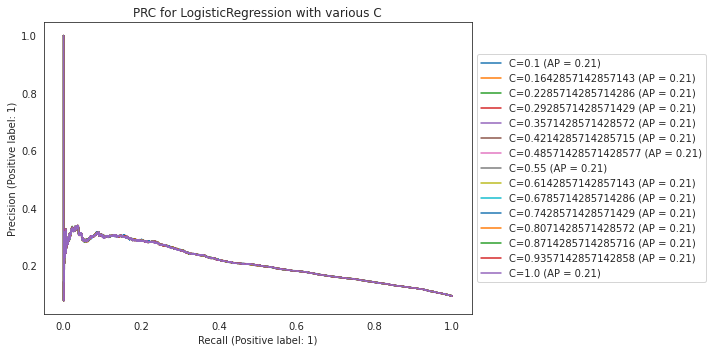

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

cs = np.linspace(0.1, 1, 15)
log_best_c, best_AUC, AP_of_best = 0, 0, 0
for c in tqdm(cs):
  lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=c).fit(X_tr, y_tr)
  y_lr_pred = lr_model.decision_function(X_val)
  PrecisionRecallDisplay.from_predictions(y_val, y_lr_pred, name="C=" + str(c), ax=ax)
  precision, recall, _ = precision_recall_curve(y_val, y_lr_pred)
  AUC = auc(recall, precision)
  AP = average_precision_score(y_val, y_lr_pred)
  if AUC > best_AUC:
    best_AUC = AUC
    log_best_c = c
    AP_of_best = AP
  print("C=%.3f" % c, 'AUC=%.8f'% AUC, ' AP=%.8f' % AP)

ax.set_title("PRC for LogisticRegression with various C")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set_ylim(0, 1.1)
plt.tight_layout()

In [ ]:
log_best_c = 0.1

#### Калибровка вероятностей

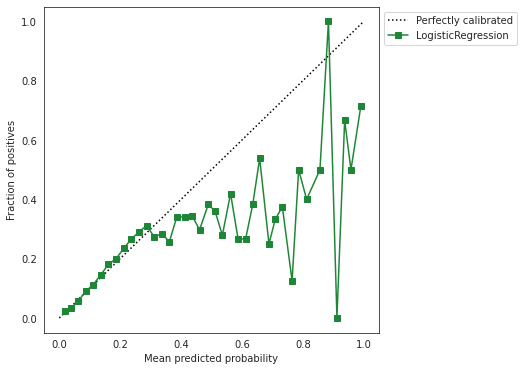

In [ ]:
lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c).fit(X_train, y_train)
fig, ax_calibr = plt.subplots(figsize=(6,6))

display = CalibrationDisplay.from_estimator(
    lr_model,
    X_train,
    y_train,
    c='#1e8737',
    n_bins=40,
    ax=ax_calibr
)
plt.legend(bbox_to_anchor=(1, 0., 0, 1))

plt.savefig('clubs_old_train_40.png', bbox_inches='tight', dpi=720)

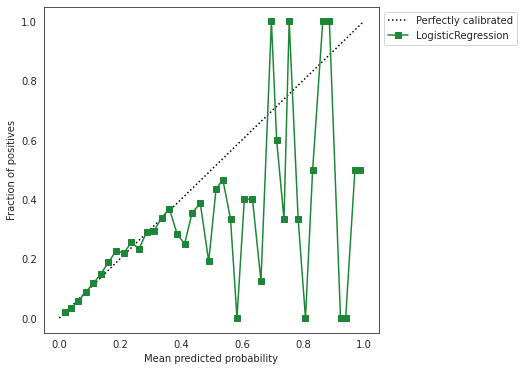

In [ ]:
lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c).fit(X_train, y_train)
fig, ax_calibr = plt.subplots(figsize=(6,6))

display = CalibrationDisplay.from_estimator(
    lr_model,
    X_test,
    y_test,
    c='#1e8737',
    n_bins=40,
    ax=ax_calibr
)
plt.legend(bbox_to_anchor=(1, 0., 0, 1))

plt.savefig('clubs_old_test_40.png', bbox_inches='tight', dpi=720)

In [ ]:
os = SMOTE(random_state=42, sampling_strategy=1)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

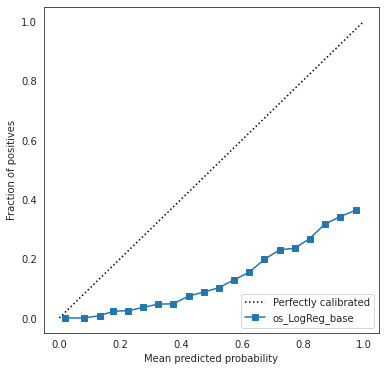

In [ ]:
os_lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c).fit(X_train_os, y_train_os)
fig, ax_calibr = plt.subplots(figsize=(6,6))

display = CalibrationDisplay.from_estimator(
    os_lr_model,
    X_test,
    y_test,
    n_bins=20,
    name='os_LogReg_base',
    ax=ax_calibr
)

In [ ]:
y_train_os.sum(), y_train_os.shape[0]

(85849, 171698)

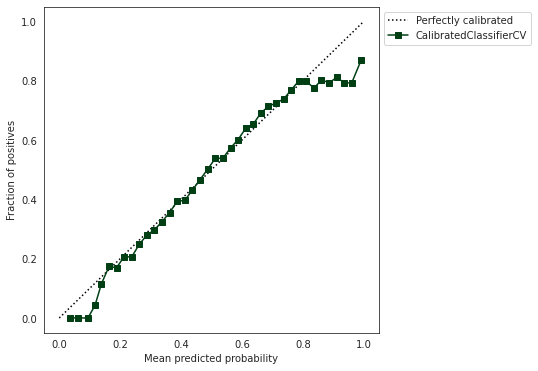

In [ ]:
os_base_lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c)
os_calibr_lr_model = CalibratedClassifierCV(os_base_lr_model, cv=7, method='sigmoid').fit(X_train_os, y_train_os)

fig, ax_calibr = plt.subplots(figsize=(6,6))

display = CalibrationDisplay.from_estimator(
    os_calibr_lr_model,
    X_train_os,
    y_train_os,
    c='#003e14',
    n_bins=40,
    ax=ax_calibr
)
plt.legend(bbox_to_anchor=(1, 0., 0, 1))

plt.savefig('clubs_os_train_40.png', bbox_inches='tight', dpi=720)

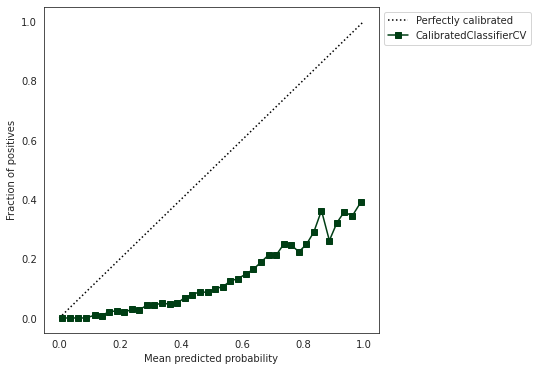

In [ ]:
os_base_lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c)
os_calibr_lr_model = CalibratedClassifierCV(os_base_lr_model, cv=7, method='sigmoid').fit(X_train_os, y_train_os)

fig, ax_calibr = plt.subplots(figsize=(6,6))

display = CalibrationDisplay.from_estimator(
    os_calibr_lr_model,
    X_test,
    y_test,
    c='#003e14',
    n_bins=40,
    ax=ax_calibr
)
plt.legend(bbox_to_anchor=(1, 0., 0, 1))

plt.savefig('clubs_os_test_40.png', bbox_inches='tight', dpi=720)

#### __Модель 1.1 SMOTE Resampling__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

В качестве базовой модели возьмём логистическую регрессию, так как она может дать верояностную оценку похожести клиента на представителей клуба.

На данном этапе признаки с дисперсией и прологарифмированные данные не улучшают качество.

In [ ]:
over = SMOTE(random_state=42, sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under)]
os = Pipeline(steps=steps)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [ ]:
os_base_lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c)
clf = CalibratedClassifierCV(os_base_lr_model, cv=3, method='sigmoid')

In [ ]:
scores = cross_validate(clf, X_train_os, y_train_os, cv=3, scoring=scoring, return_train_score=True)

In [ ]:
print_metrics(scores)

Cross-val-scores  Train     Test
F2                65.00%      64.90%
Precision         66.29%     66.11%
Recall            64.68%      64.60%


In [ ]:
final_model = CalibratedClassifierCV(LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c, random_state=42), cv=3, method='sigmoid').fit(X_train_os, y_train_os)

In [ ]:
train_preds = final_model.predict(X_train_os)
test_preds = final_model.predict(X_test)

In [ ]:
print(f"                   Train     Test")
print(f"F2                {fbeta_score(y_train_os, train_preds, beta = 2)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_train_os, train_preds)*100:.2f}%      {precision_score(y_test, test_preds)*100:.2f}%")
print(f"Recall            {recall_score(y_train_os, train_preds)*100:.2f}%      {recall_score(y_test, test_preds)*100:.2f}%")

                   Train     Test
F2                64.94%      41.17%
Precision         66.24%      16.71%
Recall            64.63%      64.94%


In [ ]:
os_base_lr_model = LogisticRegression(max_iter=10000, penalty='l2', C=log_best_c).fit(X_train_os, y_train_os)

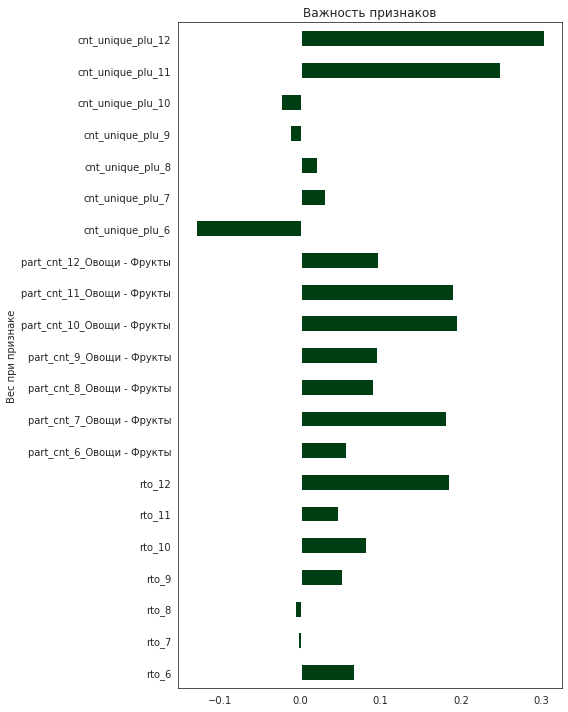

In [ ]:
feature_im = pd.Series(os_base_lr_model.coef_[0],
                        X_train_os.columns)

fig, ax = plt.subplots(figsize=(8,10))
feature_im.plot.barh(ax=ax, color='#003e14')
ax.set_title("Важность признаков")
ax.set_ylabel('Вес при признаке')
fig.tight_layout()

plt.savefig('clubs_os_test_40.png', bbox_inches='tight', dpi=720)

Посмтрим на признаки, по мнению модели, влияющие негативно на вероятность клиента быть членом клуба.

In [ ]:
feature_im.to_frame('feature_imp').sort_values(by='feature_imp')[-10:]

,feature_imp
rto_11_Сыры,0.066266
rto_11_Птица и изделия из птицы,0.074452
rto_10_Сыры,0.077930
part_cnt_6_Овощи - Фрукты,0.084293
part_cnt_11_Овощи - Фрукты,0.094046
part_cnt_9_Овощи - Фрукты,0.171238
part_cnt_10_Овощи - Фрукты,0.171653
rto_12_Овощи - Фрукты,0.189252
part_cnt_7_Овощи - Фрукты,0.276968
cnt_checks_12,0.302270


#### __Модель 1.2. PU-learning + Logistic regression__

PU Learning исходит из концепции того, что данные делятся на positive class и unlabeled. То есть подразумевается то, что в нулях могут быть потенциально позитивные записи. В нашем случае это означает, что люди, которые вступили в программу лояльности, но пока что не вступили в клуб, могут в дальнейшем в него вступить, а соответственно будут относиться к positive class. PU Learning позволяет минимизировать эффект от данной проблемы.

Модель взята из библиотеки [PULearn](https://pulearn.github.io/pulearn/), но немного изменена, так как исходная выдавала ошибки и не обучалась.

In [ ]:
class ElkanotoPuClassifier(BaseEstimator, ClassifierMixin):
    "Positive-unlabeled classifier using the unweighted Elkan & Noto method."

    def __init__(self, estimator, hold_out_ratio=0.1):
        self.estimator = estimator
        # c is the constant proba that a example is positive, init to 1
        self.c = 1.0
        self.hold_out_ratio = hold_out_ratio

    def fit(self, X, y):
        positives = np.where(y == 1.0)[0]
        hold_out_size = int(np.ceil(len(positives) * self.hold_out_ratio))
        # check for the required number of positive examples
        if len(positives) <= hold_out_size:
            raise ValueError(
                'Not enough positive examples to estimate p(s=1|y=1,x).'
                ' Need at least {}.'.format(hold_out_size + 1)
            )
        # construct the holdout set
        np.random.shuffle(positives)
        hold_out = positives[:hold_out_size]
        X_hold_out = X[hold_out]
        X = np.delete(X, hold_out, 0)
        y = y[set(y.index) - set(hold_out)]
        # fit the inner estimator
        self.estimator.fit(X, y)
        # update c, the positive proba estimate
        self.c = np.mean(self.estimator.predict_proba(X_hold_out)[:, 1])

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)[:, 1] / self.c

    def predict(self, X, threshold=0.5):
        return np.array([1.0 if p > threshold else 0 for p in self.predict_proba(X)])

In [ ]:
over = SMOTE(random_state=42, sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under)]
os = Pipeline(steps=steps)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [ ]:
%%time

pu_estimator = ElkanotoPuClassifier(estimator=CalibratedClassifierCV(LogisticRegression(max_iter=10000, penalty='l2', random_state=42,
                                                                                        C=log_best_c), cv=3, method='sigmoid'), hold_out_ratio=0.1)
pu_estimator.fit(X_train_os.values, y_train_os)

CPU times: user 11.9 s, sys: 4.76 s, total: 16.7 s
Wall time: 14.5 s


In [ ]:
train_preds = pu_estimator.predict(X_train_os.values, threshold=0.8)
test_preds = pu_estimator.predict(X_test.values, threshold=0.8)

In [ ]:
print(f"                   Train     Test")
print(f"F3                {fbeta_score(y_train_os, train_preds, beta = 3)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 3)*100:.2f}%")
print(f"F2                {fbeta_score(y_train_os, train_preds, beta = 2)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_train_os, train_preds)*100:.2f}%      {precision_score(y_test, test_preds)*100:.2f}%")
print(f"Recall            {recall_score(y_train_os, train_preds)*100:.2f}%      {recall_score(y_test, test_preds)*100:.2f}%")

                   Train     Test
F3                70.67%      52.31%
F2                69.91%      41.33%
Precision         64.32%      15.42%
Recall            71.46%      71.25%


In [ ]:
df_ys = pd.DataFrame([y_test.values,np.array(test_preds)]).transpose()
df_ys.index = df_ys.index + 94542
potential_healthy = np.array(df_ys[(df_ys[1] == 1) & (df_ys[0] == 0)].index)
healthy_but_not_active = np.array(df_ys[(df_ys[1] == 0) & (df_ys[0] == 1)].index)
potential_healthy.shape[0], healthy_but_not_active.shape[0]

(12338, 945)

In [ ]:
df_ys

,0,1
94542,0.0,0.0
94543,0.0,0.0
94544,0.0,1.0
94545,0.0,0.0
94546,0.0,0.0
...,...,...
135056,0.0,0.0
135057,0.0,1.0
135058,0.0,0.0
135059,0.0,0.0


In [ ]:
potential_healthy

array([ 94544,  94548,  94551, ..., 135050, 135053, 135057])

In [ ]:
df_potential = data.loc[potential_healthy]
df_potential

,is_in_club,cnt_checks_10_Мясная гастрономия,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,rto_10_Птица и изделия из птицы,cnt_checks_9_Рыба и рыбные изделия,...,part_cnt_10_Овощи - Фрукты,part_cnt_11_Овощи - Фрукты,part_cnt_12_Овощи - Фрукты,part_cnt_6_Рыба и рыбные изделия,part_cnt_7_Рыба и рыбные изделия,part_cnt_8_Рыба и рыбные изделия,part_cnt_9_Рыба и рыбные изделия,part_cnt_10_Рыба и рыбные изделия,part_cnt_11_Рыба и рыбные изделия,part_cnt_12_Рыба и рыбные изделия
94544,0,0.0,8.576084,0.000000,5.887619,8.587122,13.0,6.791517,6.702791,0.0,...,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
94548,0,3.0,7.771368,5.816281,6.113265,9.247551,10.0,5.898828,5.949590,0.0,...,0.142857,0.400000,0.666667,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
94551,0,2.0,8.447242,5.957938,6.085059,8.968884,17.0,6.302892,6.404580,0.0,...,0.250000,0.444444,0.461538,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
94553,0,0.0,7.526234,0.000000,5.785335,8.825331,7.0,0.000000,6.170349,0.0,...,0.666667,0.875000,0.800000,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000
94555,0,5.0,9.293854,5.994113,6.957240,9.615826,4.0,7.100547,6.623517,0.0,...,1.000000,1.000000,0.714286,0.0,0.0,0.0,0.0,0.0,0.200000,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135034,0,12.0,0.000000,6.581431,7.227825,0.000000,3.0,0.000000,7.184337,0.0,...,0.766667,0.709677,0.666667,0.0,0.0,0.0,0.0,0.0,0.032258,0.033333
135038,0,0.0,0.000000,5.955104,5.033324,0.000000,2.0,0.000000,0.000000,0.0,...,1.000000,0.700000,0.857143,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
135050,0,1.0,0.000000,4.252900,0.000000,0.000000,2.0,0.000000,0.000000,0.0,...,0.666667,0.666667,0.363636,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
135053,0,0.0,0.000000,4.264193,6.727582,0.000000,2.0,0.000000,6.566470,0.0,...,0.250000,0.250000,0.047619,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df_ys = pd.DataFrame([y_test.values,np.array(test_preds)]).transpose()
df_ys.index = df_ys.index + 94542
bad_bad = np.array(df_ys[(df_ys[1] == 0) & (df_ys[0] == 0)].index)
df_bad = data.loc[bad_bad]

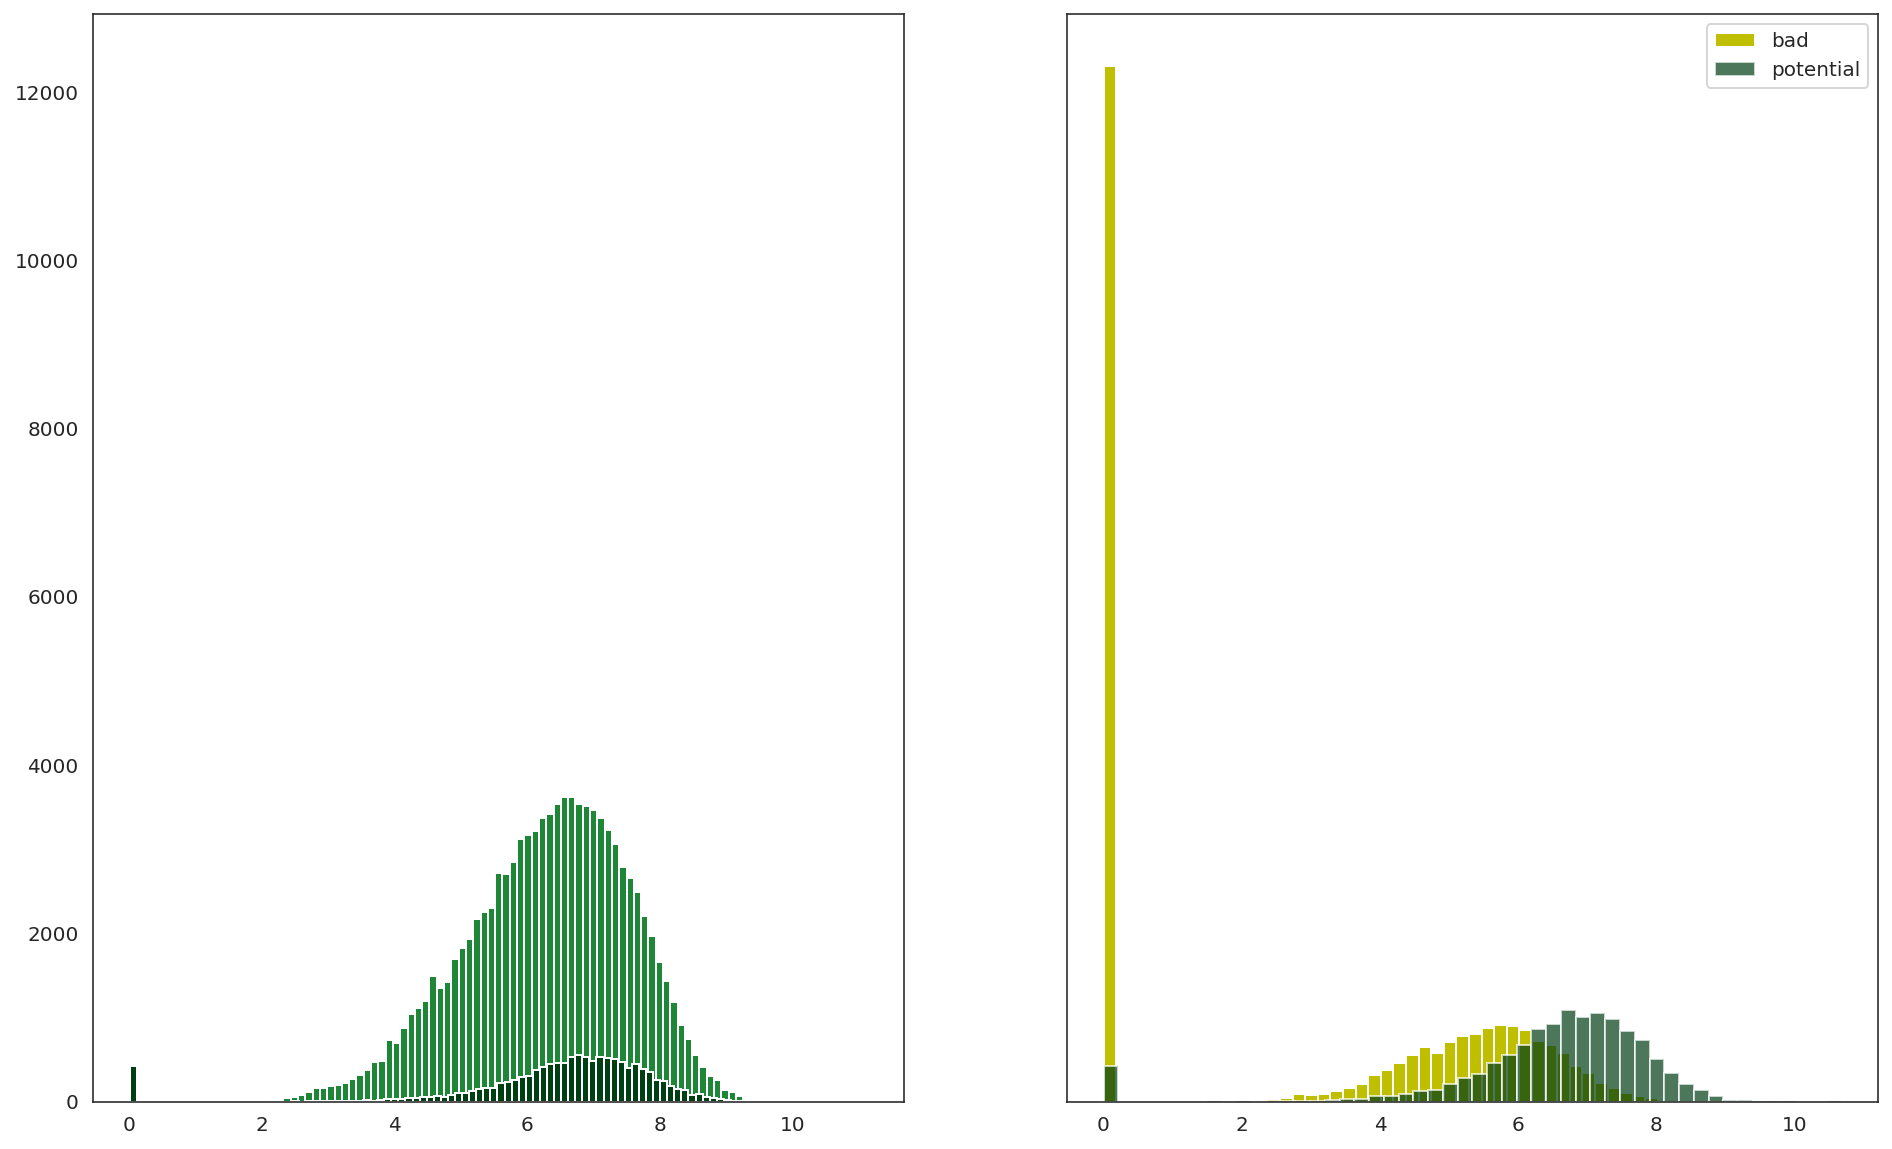

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

ax[0].hist(data[data['rto_12_Овощи - Фрукты'] > 0]['rto_12_Овощи - Фрукты'], bins=100, label='total', color='#1e8737')
ax[0].hist(df_potential['rto_12_Овощи - Фрукты'], bins=100, label='potential', color='#003e14')
ax[1].hist(df_bad['rto_12_Овощи - Фрукты'], bins=50, label='bad', color='y')
ax[1].hist(df_potential['rto_12_Овощи - Фрукты'], bins=50, label='potential', color='#003e14', alpha=0.7)

plt.legend();

In [ ]:
df_potential[cols['part_cnt']].describe()

,part_cnt_6_Овощи - Фрукты,part_cnt_7_Овощи - Фрукты,part_cnt_8_Овощи - Фрукты,part_cnt_9_Овощи - Фрукты,part_cnt_10_Овощи - Фрукты,part_cnt_11_Овощи - Фрукты,part_cnt_12_Овощи - Фрукты,part_cnt_6_Сыры,part_cnt_7_Сыры,part_cnt_8_Сыры,...,part_cnt_10_Сыры,part_cnt_11_Сыры,part_cnt_12_Сыры,part_cnt_6_Крупы и зерновые,part_cnt_7_Крупы и зерновые,part_cnt_8_Крупы и зерновые,part_cnt_9_Крупы и зерновые,part_cnt_10_Крупы и зерновые,part_cnt_11_Крупы и зерновые,part_cnt_12_Крупы и зерновые
count,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,...,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000,12338.000000
mean,0.406143,0.397603,0.392691,0.461110,0.497709,0.533118,0.519519,0.168424,0.187318,0.212327,...,0.241077,0.247566,0.240139,0.045665,0.047161,0.062125,0.073538,0.076133,0.079787,0.065371
std,0.352689,0.338618,0.327981,0.317266,0.308867,0.307498,0.292418,0.250747,0.260334,0.267467,...,0.262656,0.267337,0.249519,0.128865,0.126086,0.148814,0.153723,0.153074,0.157600,0.133203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027976,0.083333,0.200000,0.250000,0.285714,0.285714,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.375000,0.363636,0.333333,0.444444,0.500000,0.500000,0.500000,0.000000,0.066667,0.111111,...,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.666667,0.636364,0.666667,0.727273,0.769231,0.750000,0.250000,0.294118,0.333333,...,0.375000,0.375000,0.333333,0.000000,0.000000,0.055556,0.086957,0.095238,0.100000,0.083333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test[(y_test == 0) & (test_preds == 0)][cols['part_cnt']].describe()

,part_cnt_6_Овощи - Фрукты,part_cnt_7_Овощи - Фрукты,part_cnt_8_Овощи - Фрукты,part_cnt_9_Овощи - Фрукты,part_cnt_10_Овощи - Фрукты,part_cnt_11_Овощи - Фрукты,part_cnt_12_Овощи - Фрукты,part_cnt_6_Сыры,part_cnt_7_Сыры,part_cnt_8_Сыры,...,part_cnt_10_Сыры,part_cnt_11_Сыры,part_cnt_12_Сыры,part_cnt_6_Крупы и зерновые,part_cnt_7_Крупы и зерновые,part_cnt_8_Крупы и зерновые,part_cnt_9_Крупы и зерновые,part_cnt_10_Крупы и зерновые,part_cnt_11_Крупы и зерновые,part_cnt_12_Крупы и зерновые
count,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,...,25280.000000,25280.000000,25280.000000,25280.00000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000,25280.000000
mean,0.205185,0.218012,0.230609,0.229958,0.247166,0.251944,0.242726,0.078528,0.082787,0.095842,...,0.095311,0.091745,0.093655,0.02166,0.023236,0.026296,0.027974,0.027963,0.024197,0.022341
std,0.294795,0.296399,0.301668,0.294643,0.304927,0.318475,0.307237,0.185356,0.185466,0.199387,...,0.193481,0.199261,0.200305,0.09528,0.097595,0.102094,0.102417,0.104833,0.098883,0.096465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.052632,0.083333,0.120000,0.083333,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.400000,0.400000,0.400000,0.500000,0.500000,0.444444,0.000000,0.043638,0.111111,...,0.111111,0.071429,0.090909,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Семантическая оценка качества выделенной группы

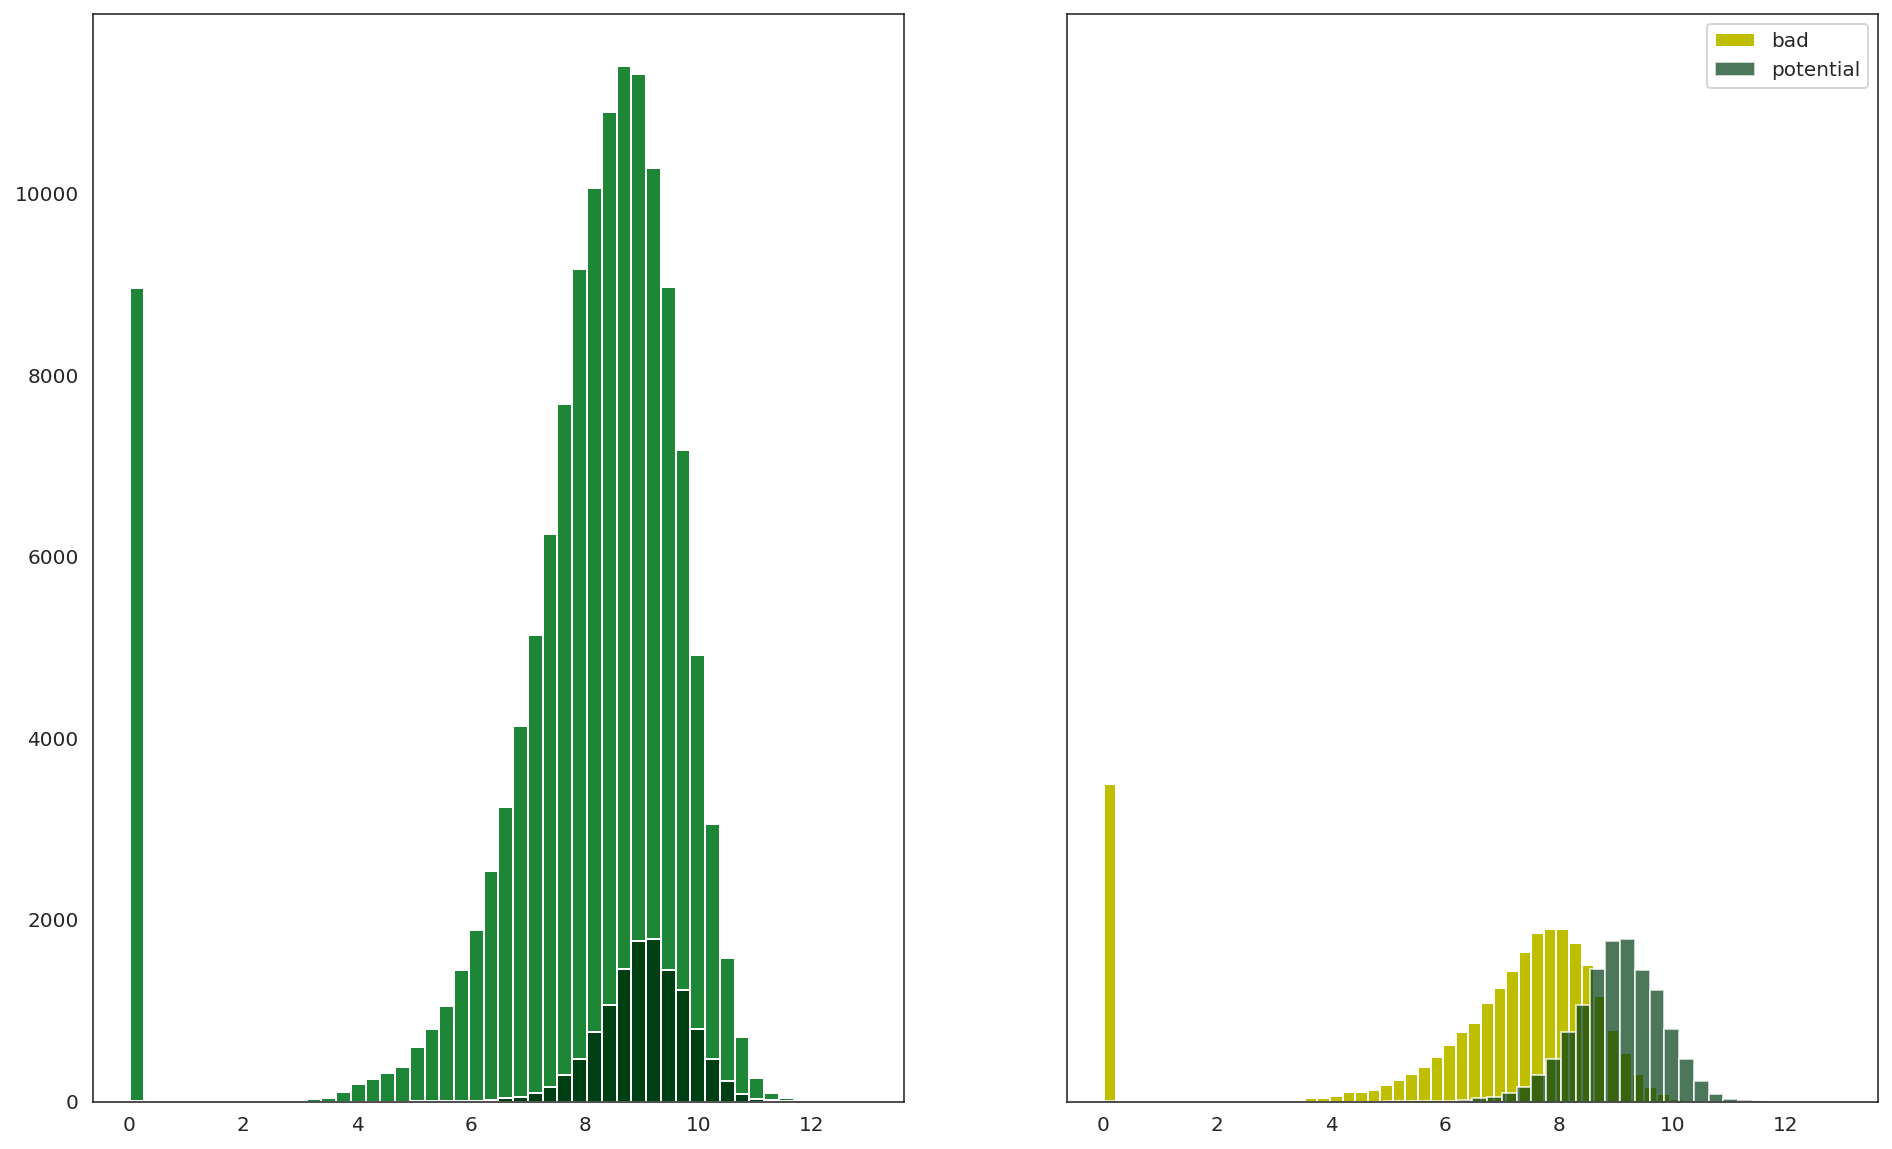

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

ax[0].hist(data['rto_12'], bins=50, label='total', color='#1e8737')
ax[0].hist(df_potential['rto_12'], bins=50, label='potential', color='#003e14')
ax[1].hist(df_bad['rto_12'], bins=50, label='bad', color='y')
ax[1].hist(df_potential['rto_12'], bins=50, label='potential', color='#003e14', alpha=0.7)

plt.legend();

In [ ]:
pu_estimator.c

0.5485500027204092

In [ ]:
def plot_calibration_curve(kind, y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2)
        ps = y_test[(preds >= l) & (preds < r)]
        bin_real_ratios.append((ps == 1).sum() / len(ps)) 
    plt.figure(figsize=(6,6))
    plt.plot([0, 1], [0, 0.1], linestyle='--', color='green')
    plt.title(kind)
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 0.45])
    plt.grid()

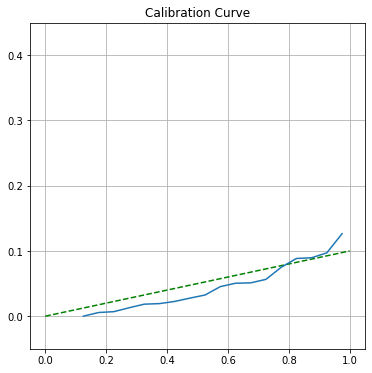

In [ ]:
lr_pred = pu_estimator.predict_proba(X_test)

plot_calibration_curve('Calibration Curve', y_test, lr_pred)

### Градиентный бустинг

In [ ]:
!pip install catboost

In [ ]:
!pip install optuna

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [ ]:
import optuna

optuna.logging.disable_propagation()
optuna.logging.disable_default_handler()

def pipeline(trial):
  n_estimators = trial.suggest_int('n_estimators', 5, 200)
  
  depth = trial.suggest_int('max_depth', 2, 10)
  subsample = trial.suggest_uniform('subsample', 0.1, 1)
  lr = trial.suggest_uniform('learning_rate', 0.001, 1)
  hold = trial.suggest_uniform('subsample', 0.01, 0.2)
  thr = trial.suggest_uniform('subsample', 0.75, 0.85)

  catboost = CatBoostClassifier(iterations=n_estimators, 
                                 learning_rate=lr, 
                                 depth=depth, 
                                 subsample=subsample, 
                                 logging_level="Silent")
  catboost = catboost.fit(X_tr_os, y_tr_os)

  val_preds = catboost.predict(X_val_os)
  print(- fbeta_score(y_val_os, val_preds, beta = 2))
  return - fbeta_score(y_val_os, val_preds, beta = 2)


study = optuna.create_study()
study.optimize(pipeline, n_trials=100)

In [ ]:
print('best catboost F2:', -study.best_value)

best catboost F2: 0.3869768944902246


In [ ]:
study.best_params

{'learning_rate': 0.9766168302426304,
 'max_depth': 7,
 'n_estimators': 165,
 'subsample': 0.6580559624906361}

In [ ]:
over = SMOTE(random_state=42, sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under)]
os = Pipeline(steps=steps)

X_train_os, y_train_os = X_train, y_train

boost = ElkanotoPuClassifier(estimator=CatBoostClassifier(iterations=60, depth=3, random_state=42, logging_level='Silent'), hold_out_ratio=0.07)
boost.fit(X_train_os.values, y_train_os)

train_preds = boost.predict(X_train_os.values, threshold=0.35)
test_preds = boost.predict(X_test.values, threshold=0.35)
print(f"                   Train     Test")
print(f"F2                {fbeta_score(y_train_os, train_preds, beta = 2)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_train_os, train_preds)*100:.2f}%      {precision_score(y_test, test_preds)*100:.2f}%")
print(f"Recall            {recall_score(y_train_os, train_preds)*100:.2f}%      {recall_score(y_test, test_preds)*100:.2f}%")

                   Train     Test
F2                42.59%      36.21%
Precision         14.00%      11.29%
Recall            87.01%      80.86%


In [ ]:
over = SMOTE(random_state=42, sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.9)
steps = [('over', over), ('under', under)]
os = Pipeline(steps=steps)

X_train_os, y_train_os = X_train, y_train

boost = ElkanotoPuClassifier(estimator=CatBoostClassifier(iterations=30, depth=4, random_state=42, logging_level='Silent'), hold_out_ratio=0.07)
boost.fit(X_train_os.values, y_train_os)

train_preds = boost.predict(X_train_os.values, threshold=0.55)
test_preds = boost.predict(X_test.values, threshold=0.55)
print(f"                   Train     Test")
print(f"F2                {fbeta_score(y_train_os, train_preds, beta = 2)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_train_os, train_preds)*100:.2f}%      {precision_score(y_test, test_preds)*100:.2f}%")
print(f"Recall            {recall_score(y_train_os, train_preds)*100:.2f}%      {recall_score(y_test, test_preds)*100:.2f}%")

                   Train     Test
F2                43.66%      37.21%
Precision         16.68%      13.89%
Recall            73.32%      64.10%


In [ ]:
over = SMOTE(random_state=42, sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('over', over), ('under', under)]
os = Pipeline(steps=steps)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)

boost = ElkanotoPuClassifier(estimator=CatBoostClassifier(iterations=40, depth=3, random_state=42, logging_level='Silent'), hold_out_ratio=0.07)
boost.fit(X_train_os.values, y_train_os)

train_preds = boost.predict(X_train_os.values, threshold=0.3)
test_preds = boost.predict(X_test.values, threshold=0.3)
print(f"                   Train     Test")
print(f"F2                {fbeta_score(y_train_os, train_preds, beta = 2)*100:.2f}%      {fbeta_score(y_test, test_preds, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_train_os, train_preds)*100:.2f}%      {precision_score(y_test, test_preds)*100:.2f}%")
print(f"Recall            {recall_score(y_train_os, train_preds)*100:.2f}%      {recall_score(y_test, test_preds)*100:.2f}%")

                   Train     Test
F2                79.01%      35.52%
Precision         56.94%      13.72%
Recall            87.49%      58.93%


In [ ]:
X_train_os

,rto_9,rto_10,rto_11,rto_12,cnt_checks_9,cnt_checks_10,cnt_checks_11,cnt_checks_12,part_cnt_6_Овощи - Фрукты,part_cnt_7_Овощи - Фрукты,...,part_cnt_10_Сыры,part_cnt_11_Сыры,part_cnt_12_Сыры,part_cnt_6_Крупы и зерновые,part_cnt_7_Крупы и зерновые,part_cnt_8_Крупы и зерновые,part_cnt_9_Крупы и зерновые,part_cnt_10_Крупы и зерновые,part_cnt_11_Крупы и зерновые,part_cnt_12_Крупы и зерновые
0,-0.029131,0.087644,0.426814,0.295768,-0.110431,0.253210,0.859279,0.495638,0.666667,0.500000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
1,-0.087748,-0.230697,0.056992,-3.497427,-0.595285,-0.716499,-0.595285,-0.958926,0.500000,1.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.454904,-0.264307,-0.420517,-3.497427,-0.231644,-0.837713,-0.716499,-0.958926,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.166667,0.000000,0.000000,0.000000
3,-0.171865,0.408035,0.393361,0.789690,-0.716499,-0.110431,-0.231644,0.131997,0.400000,0.125000,...,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.444632,0.362960,0.217621,0.594814,-0.110431,0.131997,-0.352858,0.010783,0.400000,0.857143,...,0.222222,0.400000,0.375000,0.000000,0.142857,0.000000,0.000000,0.111111,0.200000,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,-1.398791,-0.680810,-0.642184,-0.036416,-0.716499,-0.716499,-0.595285,0.495638,0.333333,0.000000,...,0.000000,0.333333,0.083333,0.333333,0.000000,0.000000,0.000000,0.500000,0.333333,0.000000
19028,-0.348481,0.372071,-0.269793,-0.114935,-0.595285,0.616851,-0.231644,-0.352858,0.800000,0.600000,...,0.153846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000
19029,0.685834,0.905647,0.835800,0.932890,1.707774,2.192629,1.950201,2.677483,0.347826,0.461538,...,0.115385,0.041667,0.133333,0.043478,0.038462,0.035714,0.000000,0.076923,0.041667,0.033333
19030,0.100218,0.280836,-0.331966,0.694376,-0.474072,-0.352858,-0.716499,-0.474072,0.600000,0.600000,...,0.200000,0.000000,0.250000,0.200000,0.200000,0.000000,0.250000,0.200000,0.000000,0.000000


In [ ]:
%%time

pu_estimator = ElkanotoPuClassifier(estimator=XGBClassifier(), hold_out_ratio=0.07)
pu_estimator.fit(X_train_os.values, y_train_os)

CPU times: user 1.98 s, sys: 12.6 ms, total: 2 s
Wall time: 2 s


## Предсказание

### Подбор порога

Выходом логистической регрессии является вероятность того, что данный клиент является членом клуба. Выбор порога позволяет понять при каком значении вероятности мы будем считать клиента потенциальным членом клуба и, следовательно, взаимодействовать с ним.

In [ ]:
pred_proba_df = pd.DataFrame(final_model.predict_proba(X_test))
threshold_list = np.arange(0,100,0.05)
threshold_scores = dict.fromkeys(threshold_list)
for threshold in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>threshold else 0)
    test_score = fbeta_score(y_test, Y_test_pred.iloc[:,1], beta= 2)
    threshold_scores[threshold] = test_score

In [ ]:
print(f"Наибольшее значение f-меры ({max(threshold_scores.values())*100:.2f}%) получается при пороге {max(threshold_scores, key=threshold_scores.get)}")

In [ ]:
pred_proba_df = pd.DataFrame(final_model.predict_proba(X_test), index=X_test.index).applymap(lambda x: 1 if x>0.45 else 0).iloc[:,1]

Итоговые метрики

In [ ]:
print(f"F2                {fbeta_score(y_test, pred_proba_df, beta = 2)*100:.2f}%")
print(f"Precision         {precision_score(y_test, pred_proba_df)*100:.2f}%")
print(f"Recall            {recall_score(y_test, pred_proba_df)*100:.2f}%")

### Сохранение результатов

In [ ]:
pd.DataFrame(final_model.predict_proba(X_test), index=X_test.index)[1]

In [ ]:
pd.DataFrame(final_model.predict_proba(X_test), index=X_test.index)[1].to_csv('test_predict_probabilities.csv')
pred_proba_df.to_csv('test_predict.csv')